# Data Exploration

In [40]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from research.strings import TARGET, PREDICTORS, DETAILS

In [47]:
# Filter to explore only the training data
SPLIT_DATE = 16252
FIGSIZE = (6, 6)
df = pd.read_csv("data/inspections.csv")
df = df.query("Inspection_Date < {}".format(SPLIT_DATE))
print("Training Data: N = {}".format(len(df)))
df.head()[DETAILS].T

Training Data: N = 17075


,0,1,2,3,4
address,3352 N BROADWAY,6059 N LINCOLN AVE,6259 N MCCORMICK RD,3253 W BRYN MAWR AVE,2112 W PETERSON AVE
aka_name,SEVEN STAR,PANERA BREAD,LITTLE QUIAPO RESTAURANT,SERGIO'S TAQUERIA PIZZA,TARGET
city,CHICAGO,CHICAGO,CHICAGO,CHICAGO,CHICAGO
dba_name,SEVEN STAR,PANERA BREAD,LITTLE QUIAPO RESTAURANT,SERGIO'S TAQUERIA PIZZA INC.,TARGET STORE # T-2079
facility_type,Grocery Store,Restaurant,Restaurant,Restaurant,Grocery Store
inspection_date,2013-01-31T00:00:00.000,2011-10-18T00:00:00.000,2011-10-18T00:00:00.000,2011-10-19T00:00:00.000,2011-10-20T00:00:00.000
inspection_type,Canvass,Canvass,Canvass,Canvass,Canvass
latitude,41.9434,41.9919,41.9956,41.9829,41.9907
license_id,30790,1.47589e+06,1.74013e+06,1.44736e+06,1.67946e+06
longitude,-87.645,-87.7096,-87.7127,-87.711,-87.683


## What types of facilities are covered in canvass inspections?

In [51]:
fac_counts = df["facility_type"].value_counts()
pd.DataFrame(fac_counts.values, fac_counts.index, columns=["Count"]).query("Count > 1").head(15)

,Count
Restaurant,13760
Grocery Store,2349
Bakery,335
School,138
Catering,132
Hospital,46
BANQUET HALL,15
Long Term Care,15
Liquor,13
Shelter,10


## Where in the city are critical violations found?

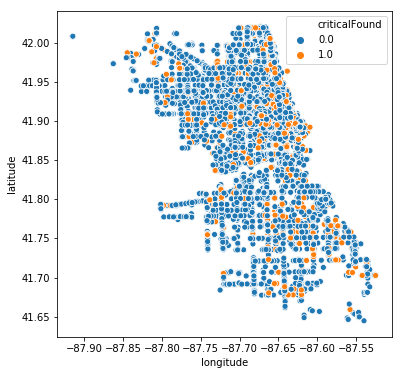

In [52]:
sns.scatterplot(x="longitude", y="latitude", hue=TARGET, data=df).figure.set_size_inches(FIGSIZE)

## Which businesses had the most critical violations?

In [54]:
biz_counts = df.query("{} > 0".format(TARGET))["License"].value_counts()
biz_df = pd.DataFrame()
biz_df["License"] = biz_counts.index
biz_df["Criticals"] = biz_counts.values
biz_df.sort_values(by="Criticals", ascending=False).head()
biz_df.set_index("License").join(
    df.set_index("License")["dba_name"]
).drop_duplicates().sort_values(by="Criticals", ascending=False).head(15)

,Criticals,dba_name
License,,
2065037,4,SOUTH BRANCH
11030,3,KINCADE'S
1769408,3,CHOP SUEY HUANG
1948824,3,"PITA KABAB, INC."
1381615,3,"ANDIAMO'S O'HARE, LLC"
9821,3,FURAMA RESTAURANT INC
2094329,3,FRANKS 'N' DAWGS
1823586,3,DEMERA ETHIOPIAN RESTAURANT
14616,3,"ILLINOIS SPORTSERVICE, INC."


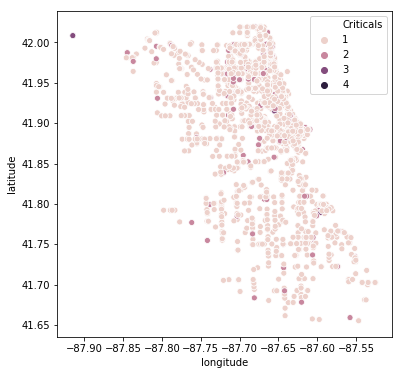

In [59]:
sns.scatterplot(x="longitude", y="latitude", hue="Criticals", data=biz_df.set_index("License").join(
    df.set_index("License")[["longitude", "latitude"]]
).drop_duplicates()).figure.set_size_inches(FIGSIZE)